# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Detecting collinearity for linear regression

<br></font>
</div>

# Import modules

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Multicollearity

<div class="alert alert-block alert-info">
<font color=black><br>

- **Why is this a problem?** Correlated features induce instabilities in the coefficients of linear models and their effects cannot be well teased apart. 
- **Numerical features** use the Variance Inflation Factor (VIF). It’s called the variance inflation factor because it estimates how much the variance of a coefficient is "inflated" because of linear dependence with other predictors. Thus, a VIF of 1.8 tells us that the variance (the square of the standard error) of a particular coefficient is 80% larger than it would be if that predictor was completely uncorrelated with all the other predictors.
- **Categorical features** use the: Cramer’s V is a statistic measuring the strength of association or dependency between two (nominal) categorical variables.

<br></font>
</div>

In [3]:
# sklearn's LinearRegression may give harmless errors
# https://github.com/scipy/scipy/issues/5998
warnings.filterwarnings(
    action = 'ignore', module = 'scipy', message = '^internal gelsd')
 

def pretty_print_linear(estimator, names = None, sort = False):
    """A helper method for pretty-printing linear models' coefficients"""
    coef = estimator.coef_
    if names is None:
        names = ['X%s' % x for x in range(1, len(coef) + 1)]

    info = zip(coef, names)
    if sort:
        info = sorted(info, key = lambda x: -np.abs(x[0]))
    
    output = ['{} * {}'.format(round(coef, 3), name) for coef, name in info]
    output = ' + '.join(output)
    return output
 

# A dataset with 3 features
size = 5000
np.random.seed(0)
X = np.random.normal(0, 1, (size, 3))

# y = X0 + 2 * X1 + noise
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(0, 2, size)
linear = LinearRegression()
linear.fit(X, y)
print('Linear model:', pretty_print_linear(linear))

Linear model: 0.984 * X1 + 1.995 * X2 + -0.041 * X3


<div class="alert alert-block alert-info">
<font color=black><br>

- As we can see in this example, the model indeed recovers the underlying structure of the data very well, despite quite significant noise in the data. 
- Given that the the predictors are on the same scale, we can compare the coefficients directly to determine variable importance, we can see here that when using linear regression, X2 is the most important predictor for this given dataset. 
- To be explicit, standardized coefficients represent the mean change in the response given one standard deviation change in the predictor. 
- We can comute the **R**2** score to see how well out model worked. It takes a value ranging from 0 to 1 and is usually interpreted as summarizing the percent of variation in the response that the regression model is capable of explaining. So a R-squared of 0.65 means the model explains about 65% of the variation in our dependent variable. 
- **ATTENTION** R-squared can be arbitrarily close to 1 when the model is totally wrong.

<br></font>
</div>

In [6]:
def rsquared_score(y_true, y_pred):
    """rsquared evaluation metric"""
    rss = np.sum((y_true - y_pred) ** 2)
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    rsquared = 1 - rss / tss
    return rsquared


y_pred = linear.predict(X)
print('rsquared:', rsquared_score(y, y_pred))

# Using scikit-learn's built-in r2_score function
print('rsquared:', r2_score(y, y_pred))

# linear.score method returns R2 by default
print('rsquared:', linear.score(X, y))

rsquared: 0.5516031266827077
rsquared: 0.5516031266827077
rsquared: 0.5516031266827077


rsquared: 0.8995456300458051


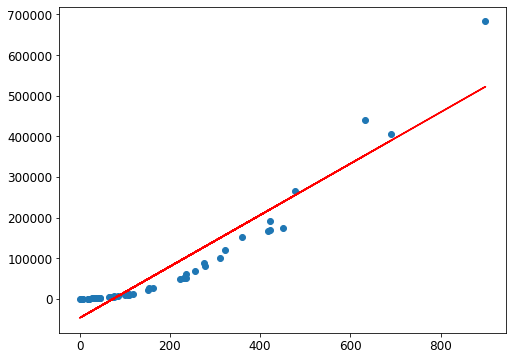

In [7]:
# change default style figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

# generate some exponential data and fit a linear regression to it
rstate = np.random.RandomState(1)
x = rstate.exponential(scale = 1 / 0.005, size = 50)
y = (x - 1) ** 2 * rstate.uniform(low = 0.8, high = 1.2, size = 50)

# scikit-learn model expects a 2d ndarray
# even if the data only contains 1 feature
X = x.reshape(-1, 1)
linear = LinearRegression()
linear.fit(X, y)
print('rsquared:', linear.score(X, y))

y_pred = linear.predict(X)
plt.plot(x, y_pred, 'r')
plt.scatter(x, y)
plt.show()

<div class="alert alert-block alert-info">
<font color=black><br>

- When checking the R-squared value for this model, it’s very high at about 0.90, but the model is completely wrong as this data follows a nonlinear distribution. Using R-squared to justify the "goodness" of our model in this instance would be a mistake. Hopefully one would plot the data first and recognize that a simple linear regression in this case would be inappropriate.
- We’re better off using Mean Square Error (MSE) or other error-based metric as a measure of prediction error. As R-squared can be anywhere between 0 and 1 just by changing the range of X.
- Let’s demonstrate this statement by first generating data that meets all simple linear regression assumptions and then regressing y on x to assess both R-squared and MSE.

<br></font>
</div>

rsquared: 0.9399557047855442
mse: 0.6525560722110444


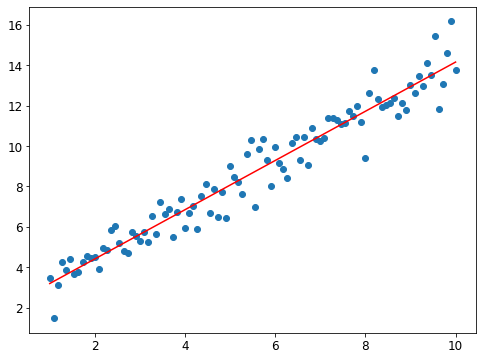

In [8]:
x = np.linspace(1, 10, 100)
y = 2 + 1.2 * x + rstate.normal(loc = 0, scale = 0.9, size = 100)
X = x.reshape(-1, 1)
linear = LinearRegression()
linear.fit(X, y)

y_pred = linear.predict(X)
print('rsquared:', r2_score(y, y_pred))
print('mse:', mean_squared_error(y, y_pred))

plt.plot(x, y_pred, 'r')
plt.scatter(x, y)
plt.show()

<div class="alert alert-block alert-info">
<font color=black><br>

- We repeat the above code, but this time with a different range of x. Leaving everything else the same.

<br></font>
</div>

rsquared: 0.11363641998838503
mse: 0.8531854804189234


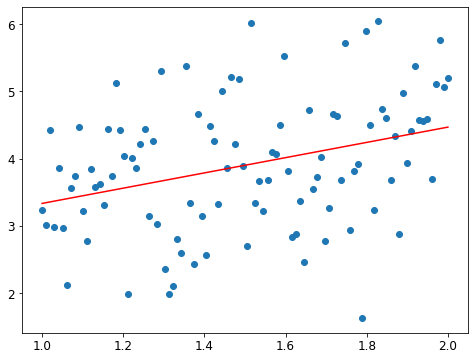

In [9]:
# smaller range for x
x = np.linspace(1, 2, 100)
y = 2 + 1.2 * x + rstate.normal(loc = 0, scale = 0.9, size = 100)
X = x.reshape(-1, 1)
linear = LinearRegression()
linear.fit(X, y)

y_pred = linear.predict(X)
print('rsquared:', r2_score(y, y_pred))
print('mse:', mean_squared_error(y, y_pred))

plt.plot(x, y_pred, 'r')
plt.scatter(x, y)
plt.show()

<div class="alert alert-block alert-info">
<font color=black><br>

- R-squared falls from around 0.9 to around 0.2, but the MSE remains fairly the same. 
- In other words the predictive ability is the same for both data sets, but the R-squared would lead you to believe the first example somehow had a model with more predictive power.  

<br></font>
</div>

# Addressing multi-collinearity

R-squared falls from around 0.9 to around 0.2, but the MSE remains fairly the same. In other words the predictive ability is the same for both data sets, but the R-squared would lead you to believe the first example somehow had a model with more predictive power.

---

The problem we just tackled was particularly well suited for a linear model: purely linear relationship between features and the response variable, and no correlations between features. The issue arises when there are multiple (linearly) correlated features (as is the case with very many real life datasets), the model then becomes unstable, meaning small changes in the data can cause large changes in the model (i.e. coefficient values), making model interpretation very difficult.

For example, assume we have a dataset where the "true" model for the data is $Y = X1 + X2$, while we observe $\hat{Y} = X1 + X2 + \epsilon$, with $\epsilon$ being the error term. On top of that let's say $X1$ and $X2$ are linearly correlated such that $X1 \approx X2$. Ideally the learned model will be $Y = X1 + X2$. But depending on the amount of noise $\epsilon$, the amount of data at hand and the correlation between $X1$ and $X2$, it could also be $Y = 2X1$ (i.e. using only $X1$ as the predictor) or $Y = −X1 + 3X2$ (shifting of the coefficients might happen to give a better fit in the noisy training set) etc.

In [8]:
def generate_random_data(size, seed):
    """Example of collinear features existing within the data"""
    rstate = np.random.RandomState(seed)
    X_seed = rstate.normal(0, 1, size)
    X1 = X_seed + rstate.normal(0, .1, size)
    X2 = X_seed + rstate.normal(0, .1, size)
    X3 = X_seed + rstate.normal(0, .1, size)
    y = X1 + X2 + X3 + rstate.normal(0, 1, size)
    X = np.array([X1, X2, X3]).T
    return X, y
    

seed = 5
size = 100
X, y = generate_random_data(size, seed)

linear = LinearRegression()
linear.fit(X, y)
print('Linear model:', pretty_print_linear(linear))
print('rsquared:', linear.score(X, y))

Linear model: -1.291 * X1 + 1.591 * X2 + 2.747 * X3
rsquared: 0.907885896631


The coefficients of our fitted linear model sums up to ~3, so we can expect it to perform well. On the other hand, if we were to interpret the coefficients at face value, then according to the model $X3$ has a strong positive impact on the output variable, while $X1$ has a negative one, when in fact all the features are correlated and should have equal effects to the output variable. This multicollearity issue also applies to other methods/algorithms and should be addressed before feeding our data to a machine learning method/algorithm.

## Variance Inflation Factor

One of the most widely used statistical measure of detecting multicollinearity amongst numerical variable is the **Variance Inflation Factor (VIF)**. The VIF may be calculated for each predictor by performing a linear regression of that predictor on all the other predictors, i.e. if we wish to calculate the VIF for predictor $x_k$, then we would use that column as the response variable and use all other columns excluding $x_k$ as the input. After fitted the linear regression, we would then obtain the rsquared value, $R^2$, which tells us how much variance in our predictor $x_k$ can be explained by all the other predictors. Lastly the VIF can be computed using:

$$
\begin{align}
VIF = \frac{1}{1 - R^2}
\end{align}
$$

It’s called the variance inflation factor because it estimates how much the variance of a coefficient is "inflated" because of linear dependence with other predictors. Thus, a VIF of 1.8 tells us that the variance (the square of the standard error) of a particular coefficient is 80% larger than it would be if that predictor was completely uncorrelated with all the other predictors.

In [9]:
def remove_collinearity(X, colnames = None, threshold = 5.0):
    """
    Identify multi-collinearity between the numeric variables
    using variance inflation factor (vif)
    """
    if colnames is None:
        colnames = ['feature' + str(j) for j in range(1, X.shape[1] + 1)]

    while True:
        n_features = X.shape[1]
        if n_features == 1:
            break

        vif = [compute_vif(X, index) for index in range(n_features)]
        max_index = np.argmax(vif)
        if vif[max_index] >= threshold:
            removed = colnames[max_index]
            colnames.remove(removed)
            X = np.delete(X, max_index, axis = 1)
        else:
            break

    return X, colnames


def compute_vif(X, target_index):
    """
    Similar implementation as statsmodel's variance_inflation_factor
    with some enhancemants:
    1. includes the intercept by default
    2. prevents float division errors (dividing by 0)

    References
    ----------
    http://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
    """
    n_features = X.shape[1]
    X_target = X[:, target_index]
    mask = np.arange(n_features) != target_index
    X_not_target = X[:, mask]

    linear = LinearRegression()
    linear.fit(X_not_target, X_target)
    rsquared = linear.score(X_not_target, X_target)
    vif = 1. / (1. - rsquared + 1e-5)
    return vif

In [10]:
# removing collinearity, thus redundant features
# while still retaining predictive power
X, colnames = remove_collinearity(X)
print('remaining feature:', colnames)

linear = LinearRegression()
linear.fit(X, y)
print('Linear model:', pretty_print_linear(linear))
print('rsquared:', linear.score(X, y))

remaining feature: ['feature3']
Linear model: 3.024 * X1
rsquared: 0.903735567258


## Cramer's V

Now that we've discussed the method for detecting collinearity amongst numerical variables, we will shift our gears towards categorical variables. **Cramer’s V** is a statistic measuring the strength of association or dependency between two (nominal) categorical variables.

Suppose $X$ and $Y$ are two categorical variables that are to be analyzed in a some experimental or observational data with the following information: 

- $X$ has $M$ distinct categories or classes, labeled $X_1,\ldots,X_M$.
- $Y$ has $N$ distinct categories, labeled $Y_1,\ldots,Y_N$.
- Form a $M\times N$ contingency table such that cell $(i,j)$ contains the count $n_{ij}$ of occurrences of category $X_i$ in $X$ and category $Y_j$ in $Y$. This would give us $n$ total pairs of observations.

We start of with the null hypothesis that $X$ and $Y$ are independent random variables, then based on the table and the null hypothesis, the chi-squared statistic $\chi^2$ can be computed. After that, Cramer's V is defined to be:

$$
\begin{align}
V=V(X,Y)=\sqrt{\frac{\chi^2}{n\operatorname{min}(M-1,N-1)}}
\end{align}
$$

Remarks:

- $0\leq V\leq 1$.  The closer $V$ is to 0, the smaller the association between the categorical variables $X$ and $Y$.  On the other hand, $V$ being close to 1 is an indication of a strong association between $X$ and $Y$. If $X=Y$, then $V(X,Y)=1$.
- In order for $V$ to make sense, each categorical variable must have at least 2 categories.
- If one of the categorical variables is dichotomous, i.e. either $M$ or $N=2$, Cramer's V is equal to the **phi statistic** ($\Phi$), which is defined to be $\Phi=\sqrt{\frac{\chi^2}{n}}$.
- Cramer's V is a chi-square based measure of association. The chi-square value depends on the strength of the relationship and sample size, while eliminates the sample size by dividing chi-square by $n$, the sample size, and taking the square root.

In [11]:
# generate a correlated categorical variable
# and see if cramer's v method will detect it
df = pd.DataFrame(index = range(1, 8))
df['a'] = ['chicken', 'chicken', 'chicken', 'chicken', 'chat', 'chat', 'chat']
df['b'] = ['dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat']
observed = pd.crosstab(df['a'], df['b'])
observed

b,cat,dog
a,,
chat,3,0
chicken,0,4


In [12]:
def compute_cramersv(observed, correction = False):
    """
    Parameters
    ----------
    observed : 2d ndarray
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) for each category.

    correction : bool, default False
        If True, and the degrees of freedom is 1, apply Yates’ correction for continuity.
        The effect of the correction is to adjust each observed value by 0.5 towards the
        corresponding expected value. This is set to False by defualt as the effect of
        Yates' correction is to prevent overestimation of statistical significance for small
        data. i.e. It is chiefly used when at least one cell of the table has an expected
        count smaller than 5. And most people probably aren't working with a data size that's
        that small.

    Returns
    -------
    cramersv : float
    """
    n_obs = observed.sum()
    n_row, n_col = observed.shape
    chi2 = chi2_contingency(observed, correction = correction)[0]
    cramersv = np.sqrt(chi2 / (n_obs * min(n_row - 1, n_col - 1)))
    return cramersv


correction = False
observed = observed.values
compute_cramersv(observed, correction)

1.0

# Reference

- [This pynb code](https://github.com/ethen8181/machine-learning/blob/master/model_selection/collinearity.ipynb)
- [Blog: Cramer’s V](http://planetmath.org/cramersv)
- [Blog: Is R-squared Useless?](http://data.library.virginia.edu/is-r-squared-useless/)
- [Blog: Deriving normal equation](https://wiseodd.github.io/techblog/2017/04/14/normal-equation/)
- [Blog: The Principle of Maximum Likelihood](http://suriyadeepan.github.io/2017-01-22-mle-linear-regression/)
- [Blog: The Normal Equation and matrix calculus](https://eli.thegreenplace.net/2015/the-normal-equation-and-matrix-calculus/)
- [Blog: When Can You Safely Ignore Multicollinearity?](https://statisticalhorizons.com/multicollinearity)
- [Blog: Selecting good features – Part II: linear models and regularization
](http://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/)
- [Blog: How to Identify the Most Important Predictor Variables in Regression Models](http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-identify-the-most-important-predictor-variables-in-regression-models)
- [Github: Duplicate (and highly correlated) categoricals](https://github.com/JosPolfliet/pandas-profiling/issues/40)